### <center> 7. Git. Ветвление и конфликты

>**Ветка** (branch) — это последовательность коммитов.

Для простоты восприятия ветку лучше всего рассматривать как временную шкалу, а коммиты в ней — версии программы, идущие друг за другом в хронологической последовательности. Посмотрим на схематичное представление веток:

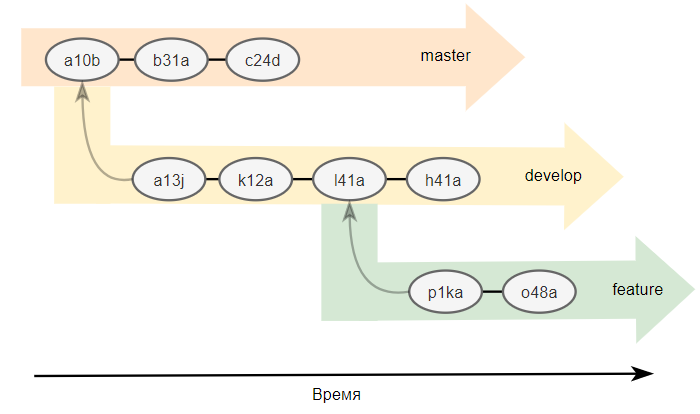

На рисунке изображены три ветки с именами `master`, `dev` и `feature`. Каждая представляет из себя последовательность коммитов (они обозначены овалами, и текст в них — первые символы хеша). Важно заметить, что ветки не пересекаются, то есть **работа в ветках идёт параллельно.**

Однако если смотреть на то, как механизм веток реализован с точки зрения системы *Git*, то **ветка — это ссылка на последний коммит в ней**. Следующая картинка похожа на предыдущую, но есть принципиальное отличие — ветка ссылается не на всю историю коммитов в ней, а только на последний. Например, под названием ветки "master" на самом деле будет скрываться ссылка на коммит c24d, а под именем "develop" — ссылка на коммит h41a. Это очень похоже на механизм работы переменных в Python.

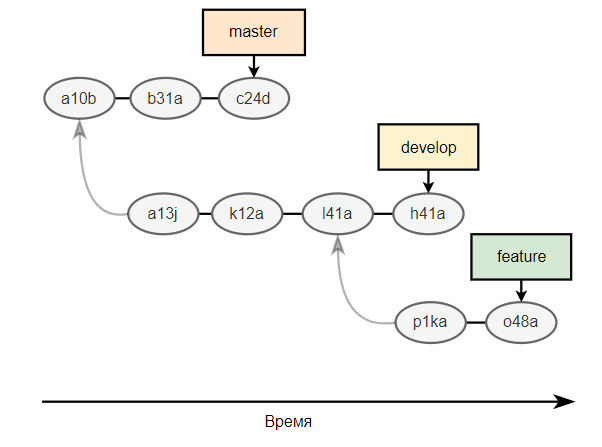

**Преимущество веток — в их независимости**: вы можете вносить изменения в файлы в одной ветке, например пробовать новую функцию, и они никак не скажутся на файлах в другой ветке. Изначально в репозитории одна ветка, но позже мы рассмотрим, как создавать другие.

На самом деле в начальный момент времени в любом репозитории всегда есть как минимум одна ветка. По умолчанию в Git ветка создаётся под именем master (в ней мы и работали ранее). Каждый раз когда мы создаём новый коммит в этой ветке, Git автоматически перемещает указатель ветки master на последний коммит.

##### <center> ЧТО ТАКОЕ ВЕТВЛЕНИЕ?

При командной разработке нередко приходится создавать определённый функционал отдельно от основного проекта.

Создание различных версий репозиториев, отличных друг от друга, и называется **ветвлением**.

При командной разработке нередко приходится создавать определённый функционал отдельно от основного проекта.

Создание различных версий репозиториев, отличных друг от друга, и называется **ветвлением**.




Приведём **пример ветвления**.

Существует некий проект, назовём его «Суперсервис». У «Суперсервиса» три разработчика: Антон, Борис и Владимир. Основная задача Антона — исправить ошибки, которые уже существуют в приложении. Задача Бориса — произвести некоторые изменения интерфейса. Владимир же разрабатывает новый функционал, требующий больших временных затрат.

Антон исправляет достаточно много ошибок и постоянно производит обновление версии проекта для пользователей, чтобы они больше не сталкивались с ошибкой.
Борис совершает обновления ежедневно, большинство из правок не такие уж и серьёзные, но некоторые должны представляться пользователю одновременно.
Владимир ведёт разработку от простого к сложному: сначала реализует по частям базовые составляющие нового функционала, а затем производит его постепенное усложнение.
Схематически их работу можно представить так:

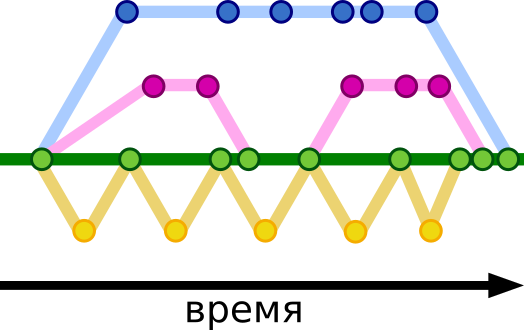
*Кругами изображены точки-фиксации изменений в репозитории (коммиты)*

>**Зелёная ветка** — ветка программы, которая доступна пользователям.

Все разработчики начинают работу с одной и той же версией репозитория, однако впоследствии каждый вносит и фиксирует свои изменения, что приводит к появлению версии программы, отличной от других. При этом в дальнейшем все изменения, созданные разработчиками, вносятся в общую ветку.

Кажется, что создание отдельных веток в этом случае излишне, ведь каждый разработчик может писать код и фиксировать изменения в локальном репозитории, а после вынести свои изменения в общую ветку.

Теперь представим, что при исправлении очередной ошибки Антон не может разобраться в логике нового интерфейса Бориса (разумеется, может, но на это потребуется больше времени) и сообщает Борису, что в новом интерфейсе есть ошибка. Что в этом случае должен сделать Борис? Исправить ошибку и отменить изменения, связанные с очередными правками интерфейса? Выложить исправление ошибки с новыми ошибками (незаконченные правки)? Исправить ошибку и заставить пользователя ждать решения, пока он допишет очередные изменения интерфейса? Созвониться с Антоном и объяснить, что и как сделать?

Наиболее вероятное решение заключается в том, что Борис зафиксирует изменения, над которыми он работал, **в отдельной ветке проекта**, а сам попытается исправить ошибку, предоставив Антону возможность работать над другими ошибками. Это пример создания веток в локальном репозитории.

Другая ситуация: у Антона, Бориса и Владимира есть руководитель — Геннадий, в обязанности которого входит проверка кода, написанного разработчиками. Если код некачественный, Геннадий даёт указание его доработать. Как он увидит код, написанный разработчиками, до того, как они «испортят» версию программы, доступную пользователям? Наиболее вероятное решение состоит в том, что каждый разработчик ведёт работу в отдельной ветке по каждой задаче, а Геннадий проверяет код в этих ветках перед тем, как внести его в «пользовательскую» версию программы. В этом случае ветки отправляются в удалённый репозиторий.


##### <center> СОЗДАНИЕ ВЕТКИ И ПЕРЕКЛЮЧЕНИЕ НА ВЕТКУ

Рассмотрим команды *git*, которые нам понадобятся для работы с ветками проекта

1. `git branch`
Команда для создания/удаления ветви. Её полный **синтаксис**:

`git branch [наименование ветки]`

Например, следующая команда создаст ветку с именем develop:

`git branch develop`

>**Примечание**. На самом деле `git branch` — очень мощная команда, которая умеет многое. Сейчас мы рассматриваем её как инструмент для создания веток. Ниже мы рассмотрим некоторые другие способы её применения.

Для **удаления** ветки используется та же самая команда `branch`, но с ключом `-D`. Например, следующая команда удалит ветку с именем `develop`:

`git branch -D develop`

2. `git checkout`
Команда, перемещающая указатель на определённую ветку (указатель на ветку — это указатель на последний коммит в ней.)

Например, следующее сочетание команд создаёт ветку `dev` и переключает нас на неё:

```python
git branch develop
git checkout develop
```

На самом деле эту запись можно сократить до одной команды. 
Чтобы создать ветку и автоматически переключиться на нее, достаточно в команде `checkout` указать ключ `-b`. Это намного удобнее, чем выполнять два этих действия по отдельности. Поэтому данный способ является более предпочтительным. Пример:

`git checkout -b develop`

>**Важное замечание**: как только вы создали новую ветку с помощью команды `branch`, она указывает на тот же коммит, что и основная ветка, из которой вы работали ранее, и *HEAD*.

Графически ситуация выглядит так:

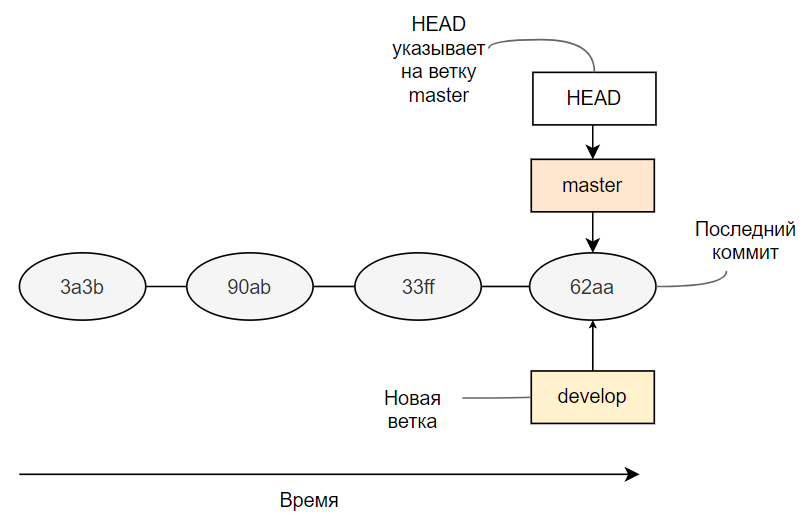

Если же вы переключитесь на новую ветку (используя команду `checkout`), поработаете в ней, внесёте какие-то изменения и сделаете несколько коммитов, то ситуация будет выглядеть вот так:

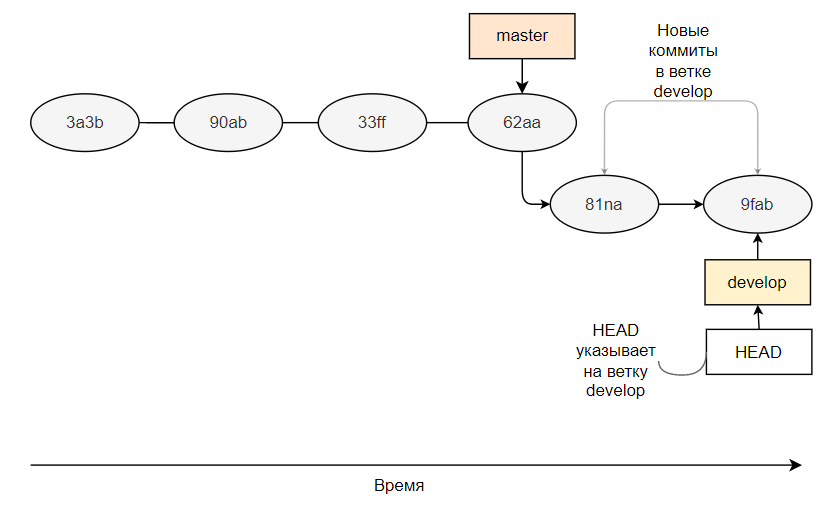

Видно, что указатель ветки `develop` и указатель текущего состояния *HEAD* передвинулись на последний коммит `9fab`. При этом важно отметить, что так как и ветка, и *HEAD* указывают на одно и то же, то состояния “*detached head*” не возникает.



##### <center> ПРОСМОТР СПИСКА ВЕТОК И ИХ СОСТОЯНИЙ

Когда в проекте много веток, существует вероятность, что вы забудете их имена, а без знания имени ветки работать с ней у вас не получится. Для просмотра списка веток используется всё та же команда `branch`.

Можно просто вызвать команду из терминала, и она выведет список всех локальных веток. Например:

```python
git branch
* master
* develop
```

Однако можно добавить **ключи**:

  - `-r` (от англ. remote). Выводит список **только удалённых** веток (тех, которые находятся в удалённом репозитории). **Пример**:

```python
git branch -r
* origin/master
```

  - `-a`. Выводит все ветки — как локальные, так и удаленные. **Пример**:

```python
git branch -a
* master 
* develop
* remotes/origin/master
```

Для просмотра состояния файлов, информации по истории коммитов и изменений, которые в них были произведены в текущей ветке, используются те же самые команды status, log и show, которые мы изучали ранее

##### <center> СЛИЯНИЕ ВЕТОК

Обычно в проекте существует основная ветка (у нас это ветка `master`), в которой находится рабочая версия кода. То есть в основную ветку попадают только протестированные изменения, которые не придётся исправлять в будущем.

Представим ситуацию: мы создали ветку `develop` и написали в ней новый код — добавили несколько новых и полезных функций или даже несколько файлов. Теперь нам надо отразить полученные изменения в главной ветке `master` нашего проекта, в которой ведётся разработка. Для этого нам как раз и понадобится слияние.

>**Слияние веток** — это процесс переноса изменений из одной ветки в другую. При этом слияние **не затрагивает** сливаемую ветку (ту, из которой мы берём изменения), то есть она остаётся в том же состоянии, что позволяет нам потом продолжить работу с ней. Ветка, в которую сливаются все изменения, называется **целевой**.

1. `git merge`
Данная команда вносит коммиты из другой ветки в текущую. Её **синтаксис**:

`git merge [имя сливаемой ветки]`

В *Git* существует две **стратегии слияния** — неявное и явное. 

В случае **неявного** слияния (используется по умолчанию) **не создаётся никаких новых коммитов** — используются только уже существующие. Идея такого слияния заключается в том, что из вливаемой ветки извлекается несколько коммитов, а затем они применяются к последнему коммиту целевой ветки. Такое слияние называется `fast-forward`.

Пример выполнения неявного `fast-forward`-слияния для случая нашего репозитория из примера выше:

```python
git checkout master
git merge develop
```

*Что происходит в результате выполнения этих команд?*

>1. Проверяется, что в ветке *master* отсутствуют коммиты, сделанные после ответвления *develop*.
>2. Проверяется, что не возникает **конфликтов** слияния (о них мы поговорим ниже).
>3. Переносится указатель *master* на коммит `9fab`.
Теперь ветка *develop* как бы стала веткой *master*.
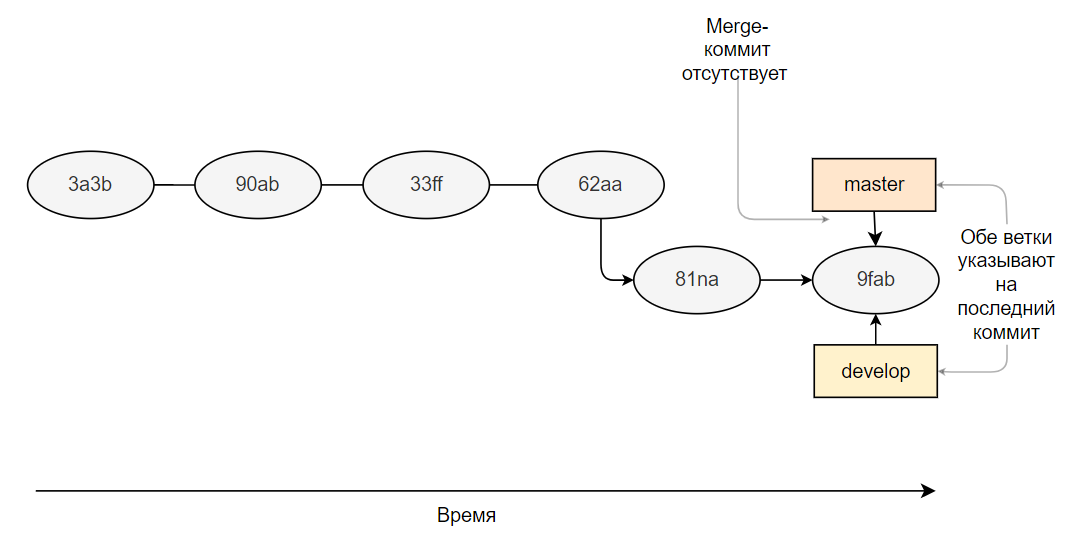

В случае **явного слияния** (оно задаётся с помощью ключа `no-ff`) всегда создаётся новый так называемый *merge*-коммит, который «объединяет» изменения двух веток. 

У этого коммита есть особенность — **два родительских коммита**: *первый родитель* — последний коммит сливаемой ветки, *второй* — последний коммит целевой ветки.

Пример выполнения явного *no-fast-forward*-слияния для случая нашего репозитория из примера выше:

```python
git checkout master
git merge –-no-ff develop
```

*Что происходит в результате выполнения этих команд?*

>1. Проверяется, нет ли **конфликтов** слияния. Если возникает конфликт, выполнение команды `git merge` **останавливается**, чтобы получить инструкции от пользователя (об этом мы поговорим ниже).
>2. Все изменения из коммитов `81na` и `9fab` добавляются в индекс ветки *master*.
>3. Выполняется коммит.
![image-2.png](attachment:image-2.png)

**Отличия в схемах слияния веток**

>Режим *fast-forward* используется по умолчанию (без дополнительных ключей) и считается более **удобным**, поскольку он не подразумевает создания лишних *merge*-коммитов, *засоряющих историю репозитория*. С другой стороны, если мы захотим продолжить пользоваться веткой *develop* после *fast-forward*-слияния, потом будет довольно трудно разобраться в её истории. Поэтому, выполняя слияние, задумайтесь, хотите ли вы, чтобы оно прошло в режиме *fast-forward*, или лучше явно создать *merge*-коммит, собирающий всё воедино.


**Примечание**. После слияния веток вы можете отправить изменения из веток *develop* и *master* на удаленный репозиторий:

```python
git push origin develop
git push origin master
```

##### <center> КОНФЛИКТЫ

###### ЧТО ТАКОЕ КОНФЛИКТ?

При работе с исходным кодом часто возникают ситуации, когда несколько разработчиков одновременно редактируют один и тот же код. В этом случае при слиянии кода система контроля версий не может определить, какой код правильный.

>Рассмотрим простой пример. Одному разработчику поставили задачу изменить текст на главной странице сайта (исправить ошибку в слове «Заклавная»). Второй разработчик должен изменить оформление этого же текста (изменить размер шрифта), при этом не трогая сам текст.
Если задачи осуществлялись параллельно, то получается, что один и тот же участок кода изменён обоими разработчиками. Какая версия в этом случае является верной? Однозначно определить нельзя. Это и называется конфликтом.

Схематично это можно представить следующим образом:

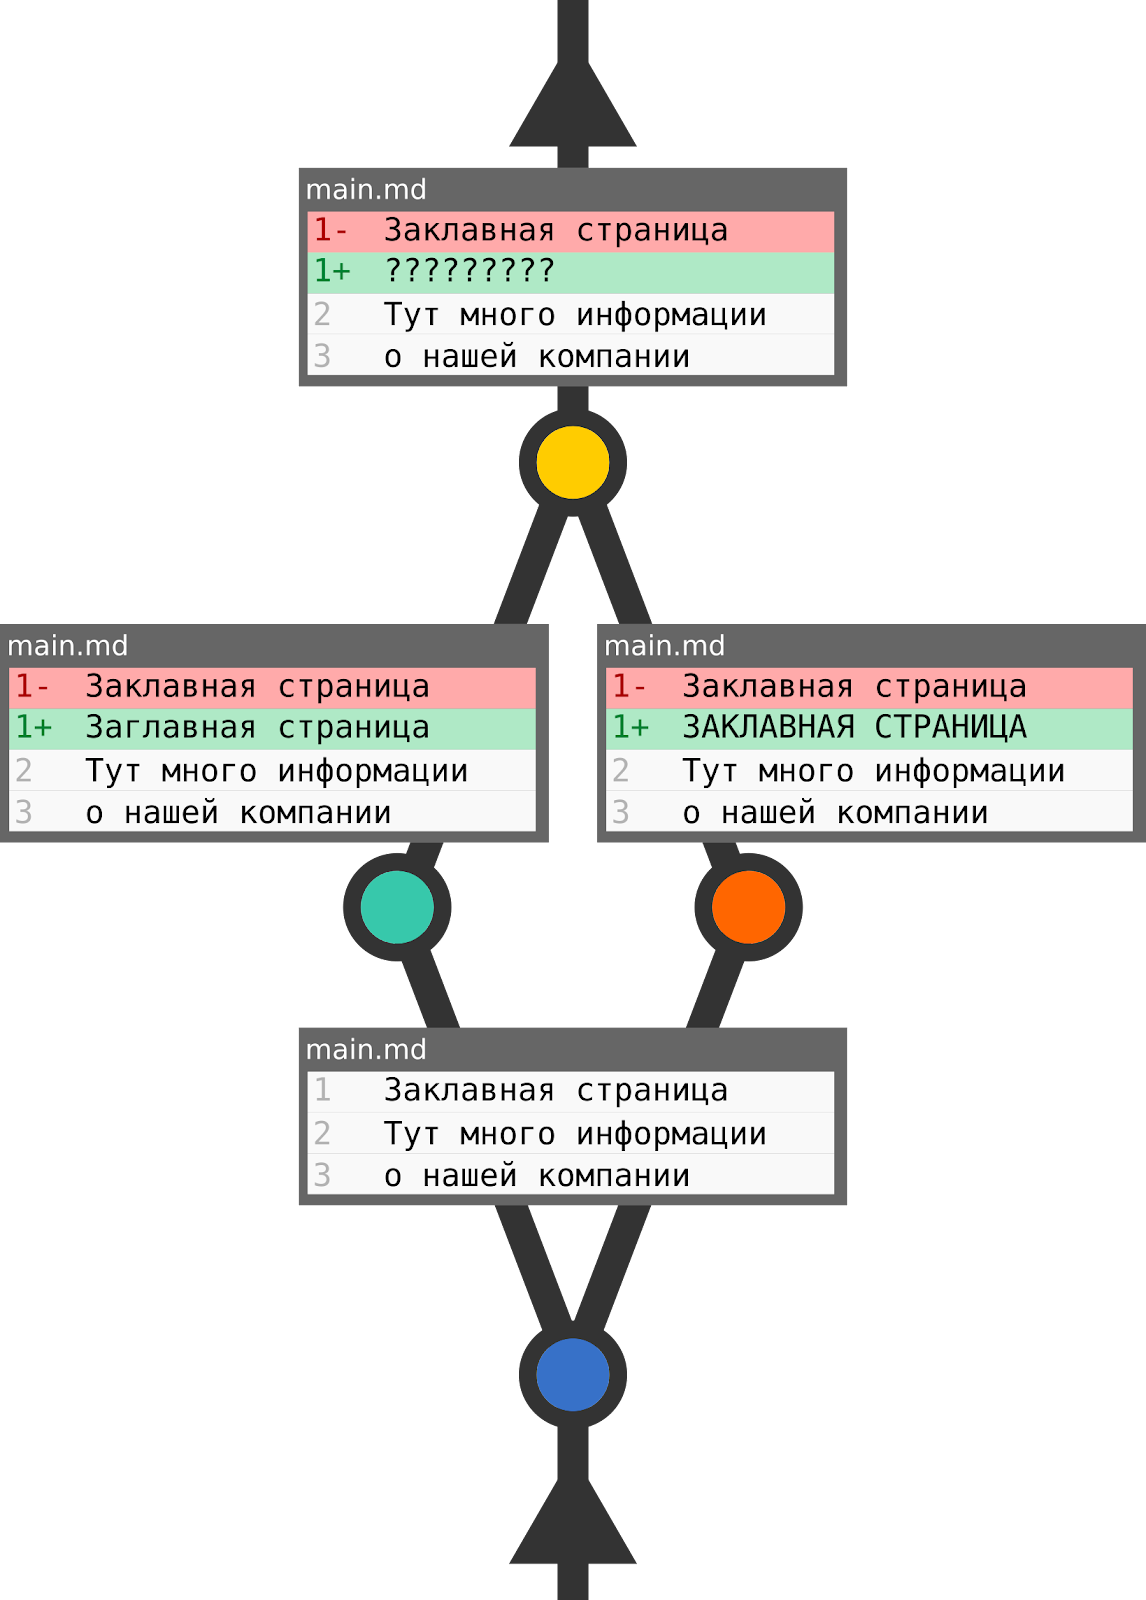

###### РЕШЕНИЕ КОНФЛИКТОВ

Если подобные ветки слить с помощью команды `merge`, результат будет примерно следующим:

```
<<<<<<< HEAD
    Заклавная страница
=======
    ЗАКЛАВНАЯ СТРАНИЦА
>>>>>>> master
```
, 

а сам Git при выполнении команды сообщит вам о конфликте:

`CONFLICT (content): Merge conflict in main.md`

**Что делать в этом случае?**

Всё просто: требуется **вручную написать результирующий код**, а после этого зафиксировать (закоммитить) изменения. Многие *IDE*, интегрированные с *Git*, представляют удобный интерфейс для решения конфликтов.

Полностью избежать конфликтов нельзя, но можно **сократить** их количество, соблюдая некоторые правила. Эти правила должны вводиться руководителем, но их соблюдение требуется от всех членов команды.

>Часто (но не всегда) конфликты может решить одна сторона. Не забывайте, что работаете в команде и не пренебрегайте знаниями второй стороны о написанном коде в случае конфликта.

###### **Рекомендации по решению конфликтов для руководителей проекта**

1. Решайте задачи таким образом, чтобы разработчики не производили изменения в одних и тех же участках кода одновременно.

Если требуется сделать несколько правок на одном участке кода, поручите это одному разработчику. Ведь если разработчики вынуждены одновременно работать с одним и тем же функционалом, вероятность конфликта возрастает, а время решения конфликта может превышать продолжительность написания кода, приведшего к конфликту.

2. Работайте с актуальной версией кода. Если произошло изменение ветки, с которой предстоит слияние, вытяните эти изменения. 

Всё просто: в потенциальном месте конфликта вы можете писать свой код уже после того, как другой разработчик напишет и опубликует свой, при этом конфликта не произойдёт.

3. Выработайте и соблюдайте требования к настройкам редактора кода, оформлению кода, используйте *editorconfig*.

Частый случай: настройки редактора кода одного разработчика форматируют исходный код на отступ в четыре пробела, настройки редактора второго — на отступ в два пробела. У обоих установлено автоформатирование перед push. Получается, что в удалённый репозиторий почти каждый раз уходят практически все файлы проекта, а что ни слияние — то конфликт. В наше время существуют инструменты для конфигурирования форматирования проекта (*editorconfig*) — изучите их синтаксис и используйте.

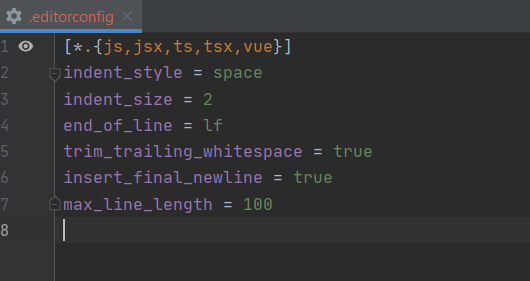
*Пример содержимого файла .editorconfig*

Внесите локальные настройки проекта и другие локальные файлы в *.gitignore*.
Соблюдайте рекомендации по разделению сущностей на разные файлы. Например, в нашем проекте по очистке данных мы вынесли функции для поиска выбросов в файл *find_outliers.py*.

Если проект в тысячу строк написан в одном файле, конфликты будут очень частым явлением.

Соблюдайте рекомендации к наименованиям и иерархии.

Например, если назвать файлы, размещённые в каталоге *Article*, *«addArticle»* и *«addComment»*, а не *«add»* и «ad*d», вероятность конфликта снизится до нуля.

### <center>  8. Методологии ветвления. Культура коммитов. Форк

**Central Workflow**

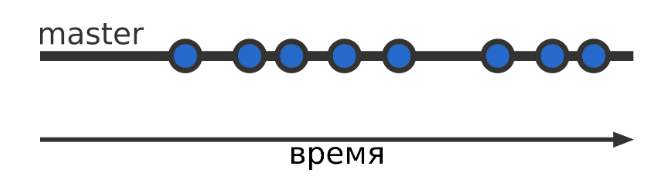

Это самая простая стратегия ветвления, не подразумевающая ветвления как такового.

Репозиторий содержит только одну главную ветку *master*. Все изменения коммитятся в неё. Репозиторий может быть как локальным, так и удалённым.

*Где используется?*

*Central Workflow* подходит для одиночного проекта.

В своём проекте вы сможете использовать эту модель, чтобы видеть, какие изменения произошли в течение процесса разработки. После проделанной работы вы фиксируете изменения так, что позже можете вернуться к любой из предыдущих версий.

**Forking Workflow**

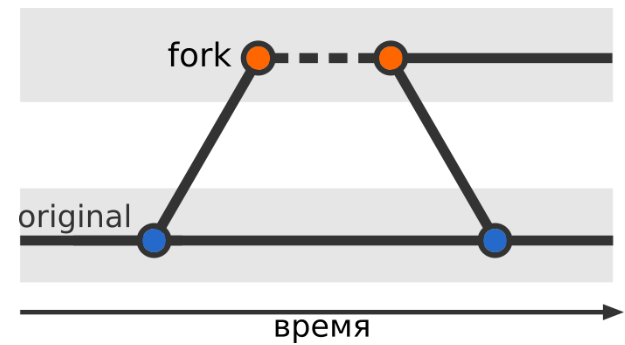

В рамках стратегии Forking Workflow разработка ведётся так, что есть два репозитория:

- оригинальный репозиторий, в который будут сливаться все изменения;

- форк репозитория (копия оригинального репозитория во владении другого разработчика, который хочет внести изменения в оригинальный).

*Где используется?*

Чаще всего *Forking Workflow* используется в проектах с **открытым** исходным кодом и **публичными** репозиториями. 

Каждый, кто может просматривать репозиторий, может сделать разветвление. Если кто-то из разработчиков сделает какие-то изменения, он может предложить их владельцу основного репозитория.

**Developer Branch Workflow**

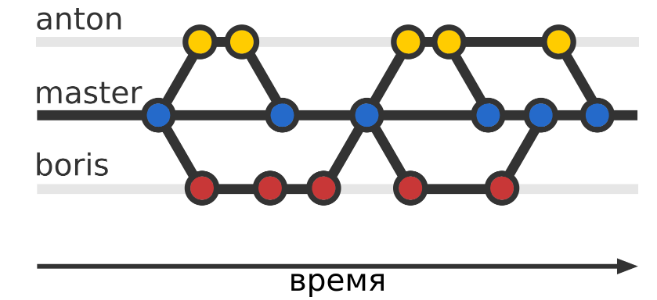

У каждого разработчика есть одна или несколько личных веток, в которые он вносит изменения. Все изменения, опубликованные в удалённом репозитории, будут в этой ветке. Вся работа может быть выполнена на разных ветках, но потом должна быть **слита в одну главную ветвь**.

*Где используется?*
Данная техника ветвления больше подойдёт для *небольшого* проекта с ограниченным количеством требований и разработчиков (меньше пяти).

Это наиболее вероятный сценарий для группового учебного проекта, когда каждый участник делает свою часть, а затем публикует её в удалённом репозитории, чтобы остальные увидели её до того, как она будет слита.

**GitHub Flow**

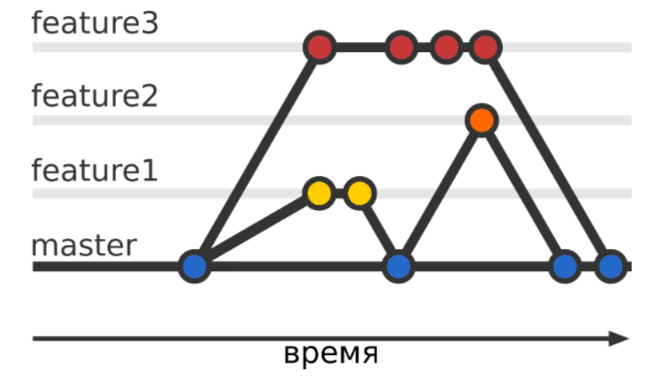

Команда *GitHub* предпочитает достаточно простую стратегию ветвления, которую можно описать несколькими правилами:

- Код в *master*-ветке должен быть работоспособным и готовым к развёртыванию в любое время.

- Все изменения производятся в отдельных ветках, созданных от *master*.

- Когда изменение завершено, его обязательно проверяет руководитель команды и ещё один специалист.

- После удачной проверки изменения его вливают в проект и немедленно разворачивают на сервере.

*Где используется?*
Стратегия подходит командам, работающий по гибким методологиям управления проектами.

**Feature Branch Workflow**

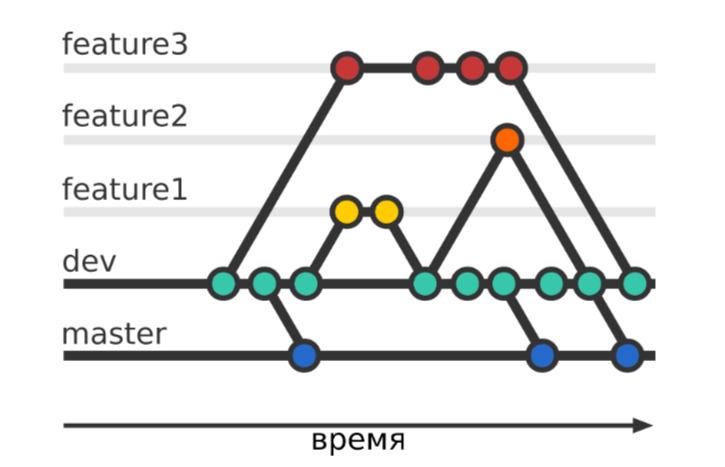

В этом случае репозиторий имеет **основную** ветку (*master*), в которой находится стабильный код проекта, предназначенный для пользователей, и **второстепенную основную** ветку (*dev*), в которой идёт *разработка*. **Ветки с новым функционалом** (фичами) начинают свой код от второстепенной ветки и сливаются с ней. Затем рабочий результат отправляется в основную ветку. Например, мы можем поручить каждому из разработчиков нашей команды написать одну или несколько конкретных функций: один пишет функцию для предобработки данных, другой — для построения визуализаций, а третий пишет код для моделирования. Каждый занимается своим функционалом, затем этот функционал объединяется в ветку *dev*, система тестируется в совокупности и выходит в релиз для пользователей.

*Где используется?*
Эта стратегия подходит командам, которые используют специальные методы управления проектами, например Agile-методологию, о которой мы поговорим далее в курсе.

**Git Flow**

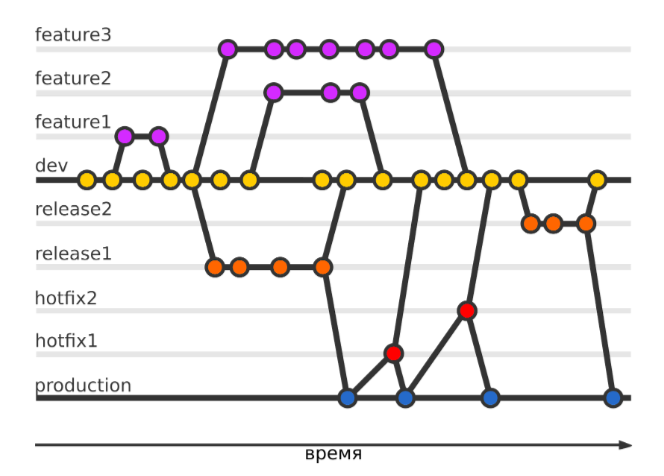

*Git Flow состоит из двух постоянных веток и нескольких типов временных веток.*

**Постоянные ветки:**

- *production* (обычно — *master*) — стабильная ветка, доступная пользователям. Напрямую в *production* изменения не производятся.

- *develop* — ветка для *разработки*. Потенциально она может быть нестабильна. При достаточном количестве изменений из *develop* создаётся *release*-ветка. *Feature*-ветки берут своё начало от *develop*.

**Остальные ветки делятся на три группы**: 

- *feature* — ветки, на которых разрабатывается новый функционал. При завершении работы над функционалом *feature*-ветки проверяются главным разработчиком и сливаются в *develop*.

- *release* — ветки, на которых идёт подготовка стабильного кода для публикации пользователям. По завершении работ по «стабилизации» и проверок кода ветка сливается в *production* и *develop*.

- *hotfix* — ветки, служащие для быстрого решения критических проблем *production*. По завершении работ по исправлению ошибки и проверок кода, ветка сливается в *production* и *develop*.

*Где используется?*
В больших и сложных проектах, например крупные и широко применяемые библиотеки.

**Issue Branch Workflow**

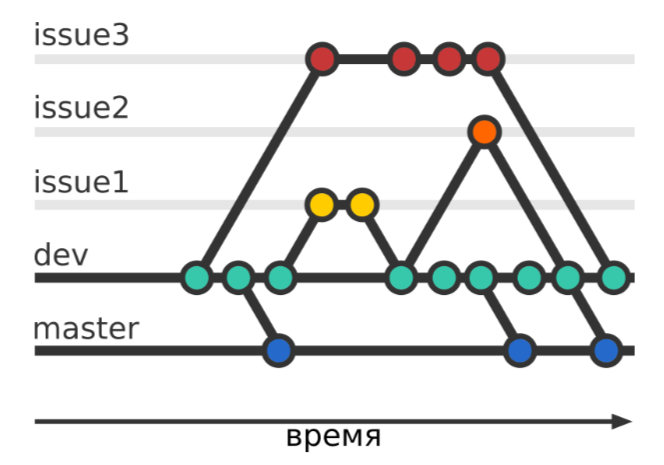

Данная стратегия очень похожа на *Feature Branch Workflow*, однако есть существенное отличие: ветки создаются по задачам, поставленным перед разработчиками, а не по фичам, а каждая фича может состоять из нескольких отдельных задач.

*Где используется?*
Как и предыдущая методология, *Issue Branch Workflow* подходит командам, работающим по специальным методологиям управления проектом.

##### <center> КУЛЬТУРА КОММИТОВ

**Основные причины написания «культурных» коммитов:**

1. Если коммиты написаны грамотно, вам будет проще найти место, где всё сломалось.
2. Каждый разработчик, прочитав коммиты при слиянии, может увидеть историю, что повысит общую информированность по проекту.
3. Благодаря средствам автоматизации можно вести *changelog* (список изменений) или оповещать других участников проекта об изменениях.
4. Понятная история развития проекта.


Основные **ПРАВИЛА** написания коммитов:

- Текст коммита формируется из трёх частей:
  - действие (добавление, исправление, рефакторинг и т. д.);
  - сущность (документация, новая модель, главная страница и т. д.);
  - подробности (задача №23, несуществующий пользователь, зависимости и т. д.) — необязательное поле.

- Полнота — не многословие. Старайтесь давать достаточную информацию об изменениях, но стоит избегать излишних подробностей.

- Используйте в коммитах английский язык. В русскоязычных командах допускаются коммиты на русском языке, но это не лучшая практика, так как ограничивает аудиторию проекта.

- Найдите свой стиль. Необязательно изобретать велосипед. Ознакомьтесь с различными практиками, соблюдайте требования команды.

Есть слова, которые уже воспринимаются разработчиками как определённые действия:

- `init` — инициализация;
- `add` — добавление;
- `delete` — удаление;
- `update` — изменение;
- `fix` — исправление;
- `refactor` — рефакторинг кода приложения;
- `style` — исправление опечаток, форматирования;
- `docs` — всё, что касается документации;
- `test` — всё, что связано с тестированием;
- `merged`, `fix conflict` — слияние, решение конфликта.

### <center> ФОРК

##### **ЧТО ТАКОЕ ФОРК?**

*Предположим, вы хотите использовали чей-то проект, содержащий уже обученную модель, например какую-нибудь нейронную сеть, которая детектирует кошек на изображениях и делает это довольно неплохо.

Модель и код по предобработке данных, который используют разработчики, хорошо вам подходит. Однако модель детектирует котов, а в вашей задаче нужно детектировать страусов.

Вы создаёте свой проект, в котором будет использоваться тот же код, с заменой датасета с изображениями кошек на датасет с изображениями страусов.

Начинать с нуля — значит потратить много времени. Просто скачать код проекта и создать новый репозиторий, во-первых, неэтично, а во-вторых — в оригинальном репозитории автор постоянно обновляет свой код, оптимизирует код по загрузке изображений из базы данных, добавляет новые фишки обработки изображений, которые увеличивают качество детектирования и многое другое.*

Тогда вы решаете создать **форк — собственный проект, основанный на другом проекте, но при этом сохраняющий связь с ним.**

Это был простой пример. Бывают и другие ситуации, когда требуется использовать другой репозиторий в качестве старта.

**Важные возможности форка:**

- сохраняет связь с проектом-родителем, по которой он может **получить изменения** из проекта-родителя;
- сохраняет связь с проектом-родителем, по которой он может **передать изменения** в проект-родитель. Этот принцип используется в методологии ветвления *Forking Workflow*.

**КАК СОЗДАТЬ FORK**

В *Git* создание форка изначально не предусмотрено, но есть возможность работать с удалёнными репозиториями, благодаря которой различные хостинги IT-проектов реализуют функционал создания форка.

На *GitHub* форк создаётся с помощью кнопки *fork*, которая появляется в интерфейсе при просмотре чужих проектов.

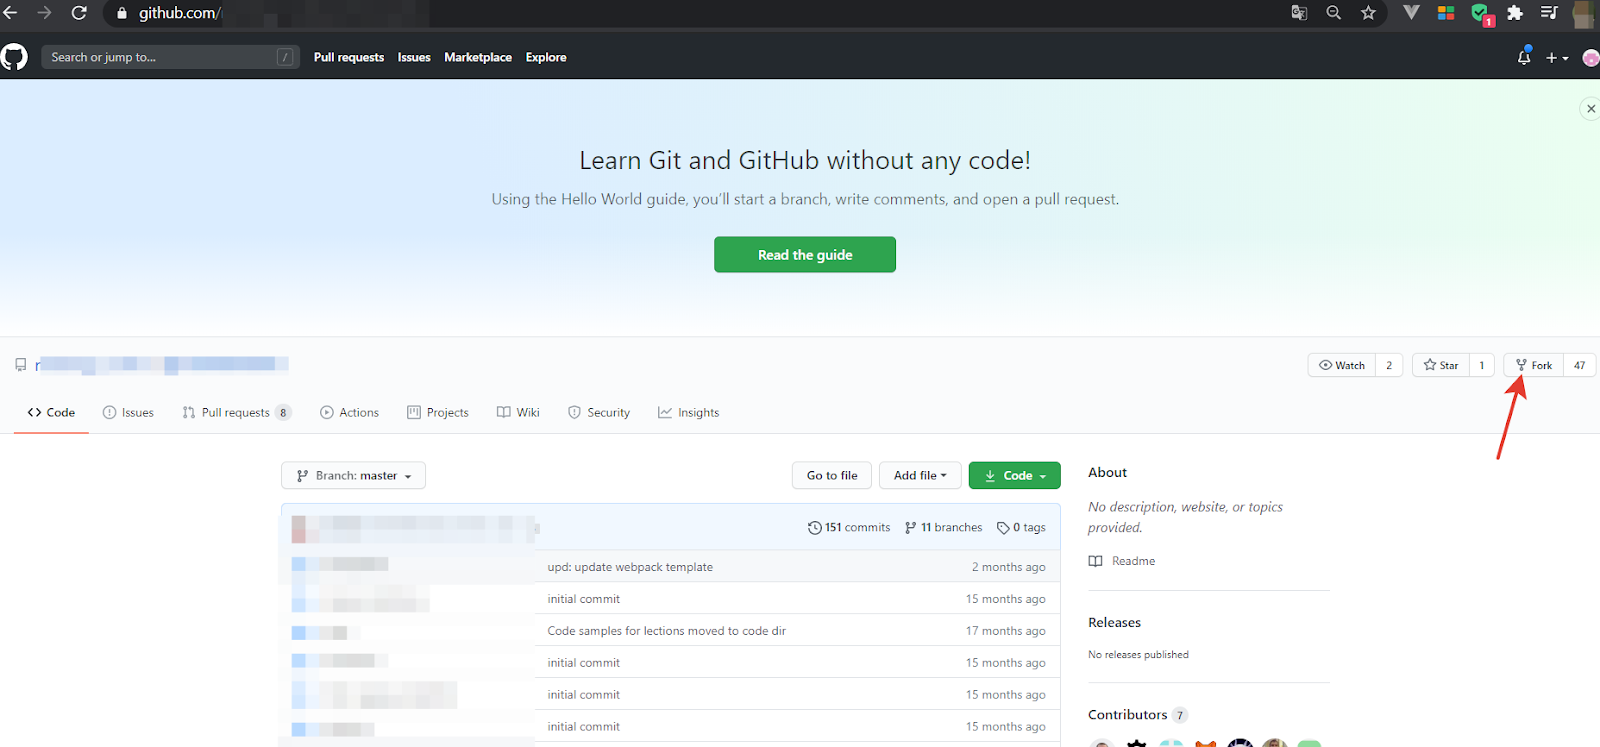
*Расположение кнопки создания форка в репозитории на GitHub.*

>Далее, как только вы сделаете форк проекта, он появится в списке ваших репозиториев на *GitHub*, и вы сможете работать с этим репозиторием как угодно — для этого будет достаточно связать его с вашим локальным репозиторием, как мы делали это ранее.